# Deep Learning A Z Convolucional - Gatos e cachorros

In [ ]:
!pip install tensorflow==2.16.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 20.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
np.__version__, tf.__version__

('1.25.2', '2.16.1')

In [ ]:
import tempfile
import zipfile

temp_dir = tempfile.TemporaryDirectory()
print(temp_dir)

<TemporaryDirectory '/tmp/tmpz8w2d93o'>


In [ ]:
with zipfile.ZipFile('dataset.zip', 'r') as zip:
  zip.extractall(temp_dir.name)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
classificador = Sequential()
classificador.add(InputLayer(shape = (64, 64, 3)))

classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

classificador.add(Conv2D(32, (3, 3), activation='relu'))
classificador.add(BatchNormalization())
classificador.add(MaxPooling2D(pool_size=(2, 2)))

classificador.add(Flatten())

classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))
classificador.add(Dense(units=128, activation='relu'))
classificador.add(Dropout(0.2))

classificador.add(Dense(units = 1, activation='sigmoid'))

In [ ]:
classificador.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         802,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 829,985 (3.17 MB)

 Trainable params: 829,857 (3.17 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
classificador.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
gerador_treinamento = ImageDataGenerator(rescale=1./255, rotation_range=7,
                                         horizontal_flip = True, shear_range=0.2,
                                         height_shift_range = 0.07, zoom_range=0.2)

In [ ]:
gerador_teste = ImageDataGenerator(rescale=1./255)

In [ ]:
base_treinamento = gerador_treinamento.flow_from_directory(f'{temp_dir.name}/dataset/training_set',
                                                           target_size = (64, 64),
                                                           batch_size = 32,
                                                           class_mode='binary')

Found 4000 images belonging to 2 classes.


In [ ]:
base_teste = gerador_teste.flow_from_directory(f'{temp_dir.name}/dataset/test_set',
                                               target_size = (64, 64),
                                               batch_size = 32,
                                               class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
classificador.fit(base_treinamento, epochs = 10, validation_data = base_teste)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 48s 350ms/step - accuracy: 0.5413 - loss: 0.9123 - val_accuracy: 0.5330 - val_loss: 0.7928
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 44s 347ms/step - accuracy: 0.6025 - loss: 0.6859 - val_accuracy: 0.5070 - val_loss: 1.5255
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 80s 332ms/step - accuracy: 0.6376 - loss: 0.6530 - val_accuracy: 0.6400 - val_loss: 0.6405
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 43s 342ms/step - accuracy: 0.6595 - loss: 0.6155 - val_accuracy: 0.6590 - val_loss: 0.6762
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.6897 - loss: 0.5927 - val_accuracy: 0.6390 - val_loss: 0.6515
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - accuracy: 0.7196 - loss: 0.5549 - val_accuracy: 0.7150 - val_loss: 0.5641
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 83s 341ms/step - accuracy: 0.7145 - loss: 0.5561 - val_accuracy: 0.7010 - val_loss: 0.5753
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 81s 329ms/step - accuracy: 0.7352 - loss: 0.5372 - val

In [ ]:
imagem_teste = image.load_img(f'{temp_dir.name}/dataset/test_set/cachorro/dog.3500.jpg', target_size=(64,64))

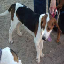

In [ ]:
imagem_teste

In [ ]:
type(imagem_teste)

PIL.Image.Image

In [ ]:
imagem_teste = image.img_to_array(imagem_teste)

In [ ]:
imagem_teste

array([[[120., 125., 119.],
        [106., 111., 105.],
        [114., 119., 113.],
        ...,
        [ 58.,  42.,  29.],
        [ 65.,  38.,  29.],
        [ 70.,  35.,  29.]],

       [[105., 110., 104.],
        [129., 134., 128.],
        [134., 139., 133.],
        ...,
        [ 59.,  41.,  29.],
        [ 66.,  42.,  32.],
        [ 69.,  40.,  32.]],

       [[126., 131., 125.],
        [131., 136., 130.],
        [118., 123., 117.],
        ...,
        [ 64.,  40.,  30.],
        [ 64.,  42.,  31.],
        [ 63.,  41.,  30.]],

       ...,

       [[158., 165., 183.],
        [188., 198., 208.],
        [184., 196., 208.],
        ...,
        [ 96.,  90.,  92.],
        [ 90.,  84.,  86.],
        [ 76.,  70.,  72.]],

       [[170., 172., 185.],
        [196., 198., 211.],
        [189., 191., 203.],
        ...,
        [ 96.,  87.,  90.],
        [ 85.,  76.,  79.],
        [ 83.,  74.,  77.]],

       [[176., 179., 184.],
        [185., 188., 193.],
        [184., 1

In [ ]:
imagem_teste /= 255

In [ ]:
imagem_teste

array([[[0.47058824, 0.49019608, 0.46666667],
        [0.41568628, 0.43529412, 0.4117647 ],
        [0.44705883, 0.46666667, 0.44313726],
        ...,
        [0.22745098, 0.16470589, 0.11372549],
        [0.25490198, 0.14901961, 0.11372549],
        [0.27450982, 0.13725491, 0.11372549]],

       [[0.4117647 , 0.43137255, 0.40784314],
        [0.5058824 , 0.5254902 , 0.5019608 ],
        [0.5254902 , 0.54509807, 0.52156866],
        ...,
        [0.23137255, 0.16078432, 0.11372549],
        [0.25882354, 0.16470589, 0.1254902 ],
        [0.27058825, 0.15686275, 0.1254902 ]],

       [[0.49411765, 0.5137255 , 0.49019608],
        [0.5137255 , 0.53333336, 0.50980395],
        [0.4627451 , 0.48235294, 0.45882353],
        ...,
        [0.2509804 , 0.15686275, 0.11764706],
        [0.2509804 , 0.16470589, 0.12156863],
        [0.24705882, 0.16078432, 0.11764706]],

       ...,

       [[0.61960787, 0.64705884, 0.7176471 ],
        [0.7372549 , 0.7764706 , 0.8156863 ],
        [0.72156864, 0

In [ ]:
imagem_teste.shape

(64, 64, 3)

In [ ]:
imagem_teste = np.expand_dims(imagem_teste, axis = 0)

In [ ]:
imagem_teste.shape

(1, 64, 64, 3)

In [ ]:
previsao = classificador.predict(imagem_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step


In [ ]:
previsao

array([[0.2648046]], dtype=float32)

In [ ]:
previsao = previsao > 0.5

In [ ]:
previsao

array([[False]])

In [ ]:
base_treinamento.class_indices

{'cachorro': 0, 'gato': 1}